In [17]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 9 ##

## Histogram Review

In [3]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [7]:
ages = 2019 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [8]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [9]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,18
5,15
10,17
15,41
25,41
40,51
65,17
100,0


In [10]:
num_movies = sum(binned_data.column('Age count'))
num_movies

200

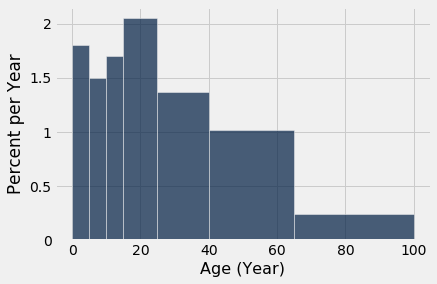

In [11]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

In [12]:
binned_data = binned_data.with_column(
    'Percent', binned_data.column('Age count')/num_movies * 100)

In [13]:
binned_data

bin,Age count,Percent
0,18,9
5,15,7.5
10,17,8.5
15,41,20.5
25,41,20.5
40,51,25.5
65,17,8.5
100,0,0


## Height

### Question: What is the height of the [40, 65] bin?

In [14]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)

In [15]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [16]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.02

### What are the heights of the rest of the bins?

In [ ]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [ ]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [ ]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [ ]:
bin_lefts

In [ ]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

## Visualization Example: Welcome Survey ##

In [18]:
survey = Table.read_table('welcome_survey_v1.csv')
survey

Extraversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position
8,10,6,Left-handed,I don't know,On your back
7,4,7,Left-handed,I don't know,On your back
3,6,7,Left-handed,I don't know,On your back
3,8,7,Left-handed,I don't know,On your back
3,3,9,Left-handed,I don't know,On your back
3,1,5,Right-handed,I don't know,On your back
4,6,5,Right-handed,I don't know,On your back
4,1,6,Right-handed,I don't know,On your back
3,3,6,Right-handed,I don't know,On your back
5,3,6,Right-handed,I don't know,On your back


### Categorical Data: Bar Charts

In [19]:
handedness = survey.group('Handedness')
handedness

Handedness,count
Both,12
Left-handed,99
Right-handed,1180


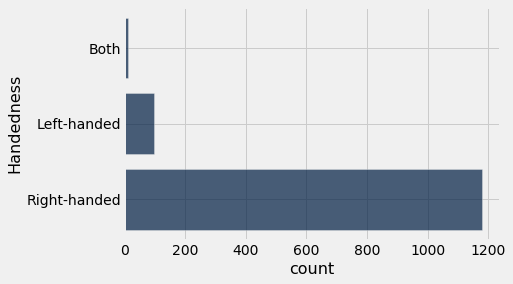

In [20]:
handedness.barh('Handedness')

### Numerical Data: Histograms

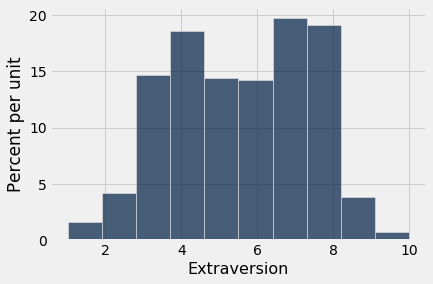

In [21]:
survey.hist('Extraversion')

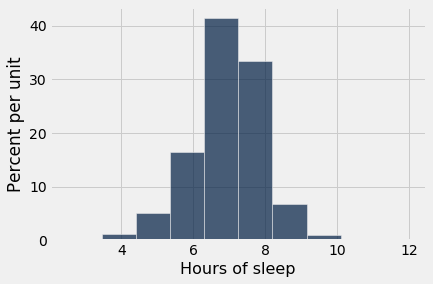

In [22]:
survey.hist('Hours of sleep')

In [23]:
max(survey.column('Hours of sleep'))

12.0

In [24]:
sleep_bins = np.arange(4,12,0.5)

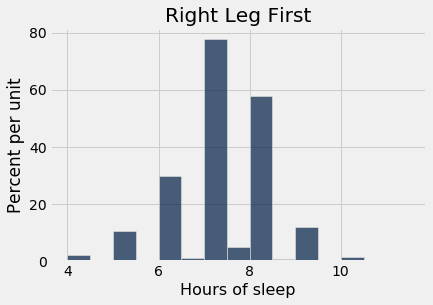

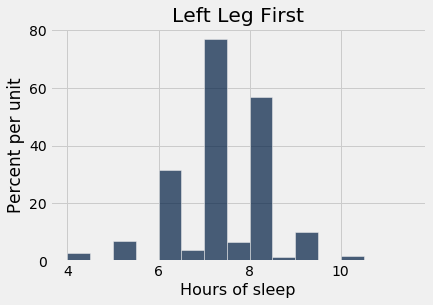

In [25]:
survey.where(
    'Pant leg',are.containing('Right')).hist('Hours of sleep', bins=sleep_bins)
plots.title('Right Leg First');

survey.where(
    'Pant leg',are.containing('Left')).hist('Hours of sleep', bins=sleep_bins)
plots.title('Left Leg First');

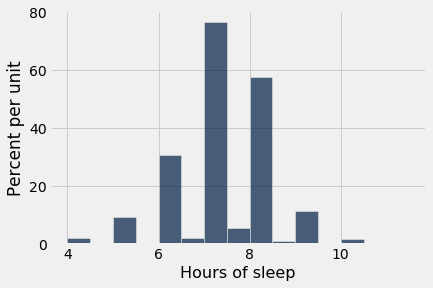

In [26]:
survey.hist('Hours of sleep', bins=sleep_bins)

In [27]:
survey.bin('Hours of sleep', bins=make_array(0,8,15))

bin,Hours of sleep count
0,824
8,467
15,0


In [28]:
467/(467 + 824) * 100

36.17350890782339

## Functions ##

In [18]:
def triple(x):
    return 3 * x

In [19]:
triple(3)

9

In [20]:
num = 4

In [21]:
triple(num)

12

In [22]:
triple(num * 5)

60

### Type Agnostic

In [27]:
triple('ha')

'hahaha'

In [28]:
triple(np.arange(4))

array([0, 3, 6, 9])

### Discussion Question

In [29]:
def percent_of_total(s):
    return np.round(s / sum(s) * 100, 2)

In [30]:
percent_of_total(make_array(1,2,3,4))

array([10., 20., 30., 40.])

In [31]:
percent_of_total(make_array(1, 213, 38))

array([ 0.4 , 84.52, 15.08])

### Multiple Arguments

$ h^2 = x^2 + y^2 \hspace{20 pt} => \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $

In [32]:
def hypotenuse(x,y):
    hypot_squared = (x ** 2 + y ** 2)
    return hypot_squared ** 0.5

In [33]:
hypotenuse(9, 12)

15.0

In [34]:
hypotenuse(2, 2)

2.8284271247461903

## Apply ##

In [35]:
ages = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
ages

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904


In [36]:
def cap_at_1980(x):
    return min(x, 1980)

In [37]:
cap_at_1980(1975)

1975

In [38]:
cap_at_1980(1991)

1980

In [39]:
ages.apply(cap_at_1980, 'Birth Year')

array([1980, 1980, 1967, 1904])

In [40]:
def name_and_age(name, year):
    age = 2019 - year
    return name + ' is ' + str(age)

In [41]:
ages.apply(name_and_age, 'Person', 'Birth Year')

array(['Jim is 34', 'Pam is 31', 'Michael is 52', 'Creed is 115'],
      dtype='<U13')